<h1>Menyiapkan Library

In [52]:
# Menyiapkan library
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from lightgbm import LGBMRegressor

<h1>Membaca Dataset<h1>

In [53]:
# Load dataset
df = pd.read_csv('unburn_carbon3.csv', delimiter=';')

# Melihat tampilan dataset
df.tail()

,time,unburn_carbon,nilai_kalor,co,co2,out_generator,sfc,eco_gas_out_temp,pa_flow,o2,...,sa_flow,carbon,hydrogen,nitrogen,sulfur,ash,total_moisture,oxygen,surface_moisture,inherent_moisture
84,15-Aug-23,0.150,4140.520000,0.000565,15.55,551.871695,0.626975,350.0,1047.949662,3.361103,...,1501.998446,43.251567,3.278504,0.680474,0.365132,6.306829,33.770,12.347494,13.508,20.262
85,06-Sep-23,0.104,4011.028978,0.001348,15.49,556.108924,0.636945,350.0,1010.383773,2.892860,...,1477.150611,43.126958,3.104372,0.657058,0.384034,5.288478,34.300,13.139101,13.720,20.580
86,18-Oct-23,0.085,3752.930377,0.000468,17.05,399.129658,0.729285,322.0,1042.587830,4.831167,...,1136.170687,39.235651,2.914904,0.586713,0.303095,5.155810,41.555,10.248827,16.622,24.933
87,16-Nov-23,0.085,4997.745494,0.000468,16.34,577.610502,0.589734,349.0,1080.776506,2.848858,...,1439.789523,50.587034,4.884406,1.124553,0.419476,4.623162,36.350,2.011369,14.540,21.810
88,13-Dec-23,0.085,3982.954375,0.000468,16.34,538.107722,0.647390,343.0,1023.165830,4.304500,...,1610.814153,41.118507,2.987656,0.634399,0.414395,6.736044,37.545,10.564000,15.018,22.527


<h1>Preprocessing

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               89 non-null     object 
 1   unburn_carbon      89 non-null     float64
 2   nilai_kalor        89 non-null     float64
 3   co                 89 non-null     float64
 4   co2                89 non-null     float64
 5   out_generator      87 non-null     float64
 6   sfc                87 non-null     float64
 7   eco_gas_out_temp   88 non-null     float64
 8   pa_flow            89 non-null     float64
 9   o2                 89 non-null     float64
 10  fuel_temp          89 non-null     float64
 11  sa_flow            89 non-null     float64
 12  carbon             89 non-null     float64
 13  hydrogen           89 non-null     float64
 14  nitrogen           89 non-null     float64
 15  sulfur             89 non-null     float64
 16  ash                89 non-nu

In [55]:
# Melihat hubungan setiap variabel independen (X) dengan variabel dependen (y)
# Proses ini disebut dengan EDA (Exploratory Data Analysis)
#sns.set_palette('colorblind')
#sns.pairplot(df, height=3)
#plt.show()

In [56]:
# kita buang kolom 'Time'
df.drop('time', axis=1, inplace=True)

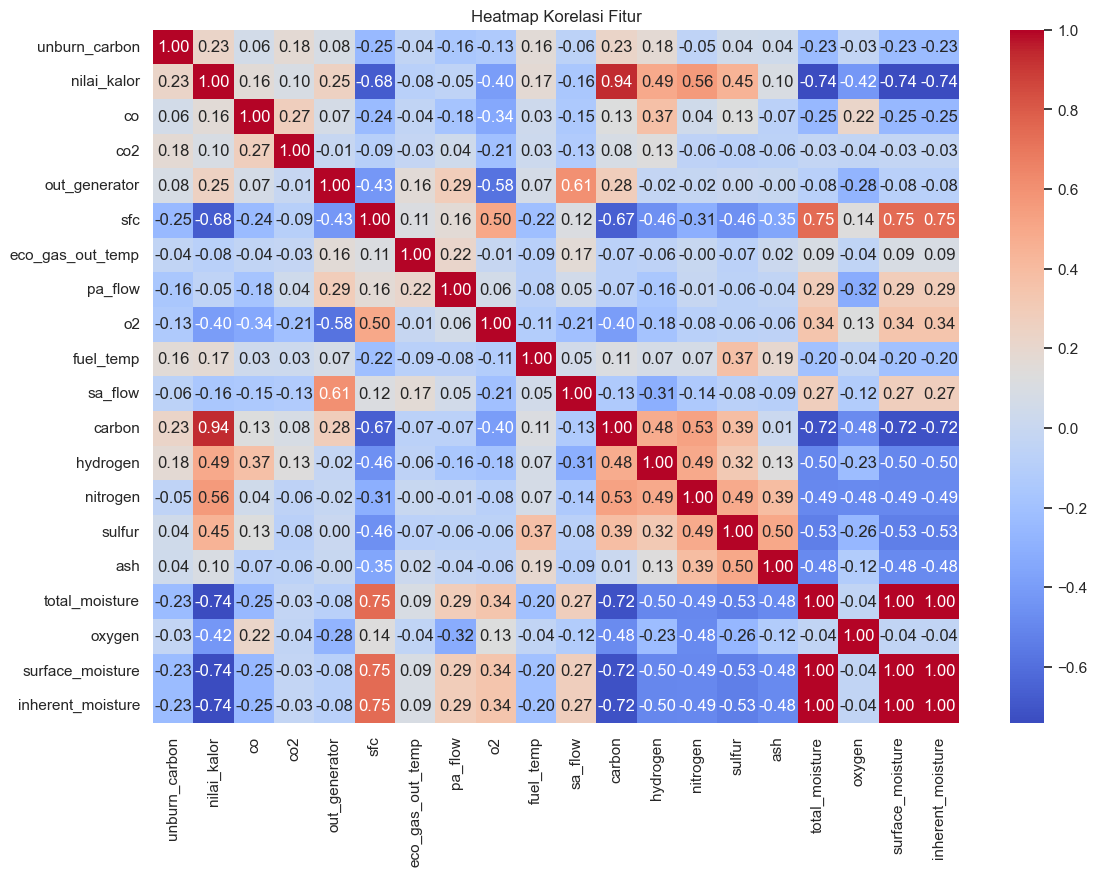

In [57]:
#menampilkan korelasi dengan heatmap
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [58]:
df = df.drop(columns=['surface_moisture', 'inherent_moisture'])

In [59]:
#mengatasi data outlier
df = df[(df['unburn_carbon'] < 2)]

In [60]:
# Mengecek data kosong
df.isnull().mean()

unburn_carbon       0.000000
nilai_kalor         0.000000
co                  0.000000
co2                 0.000000
out_generator       0.024691
sfc                 0.024691
eco_gas_out_temp    0.012346
pa_flow             0.000000
o2                  0.000000
fuel_temp           0.000000
sa_flow             0.000000
carbon              0.000000
hydrogen            0.000000
nitrogen            0.000000
sulfur              0.000000
ash                 0.000000
total_moisture      0.000000
oxygen              0.000000
dtype: float64

In [61]:
# Mengganti nilai NaN dengan median dari setiap kolom
df = df.apply(lambda col: col.fillna(col.median()), axis=0)

In [62]:
# Mengecek data kosong
df.isnull().mean()

unburn_carbon       0.0
nilai_kalor         0.0
co                  0.0
co2                 0.0
out_generator       0.0
sfc                 0.0
eco_gas_out_temp    0.0
pa_flow             0.0
o2                  0.0
fuel_temp           0.0
sa_flow             0.0
carbon              0.0
hydrogen            0.0
nitrogen            0.0
sulfur              0.0
ash                 0.0
total_moisture      0.0
oxygen              0.0
dtype: float64

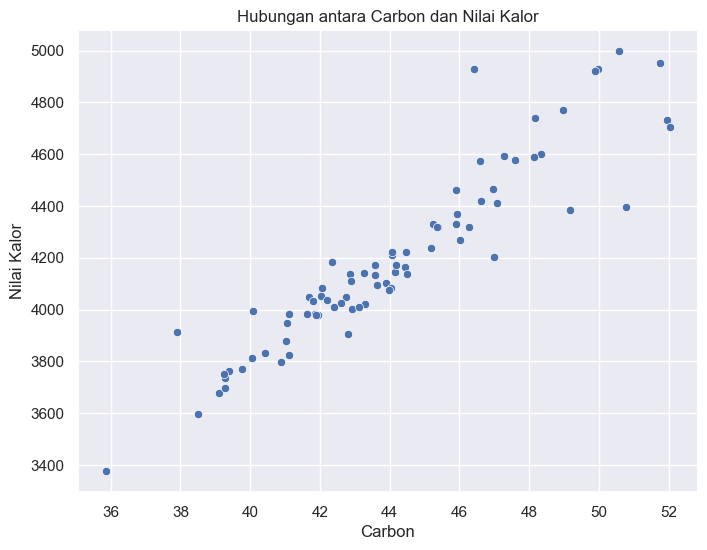

In [63]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['carbon'], y=df['nilai_kalor'])
plt.xlabel('Carbon')
plt.ylabel('Nilai Kalor')
plt.title('Hubungan antara Carbon dan Nilai Kalor')
plt.show()

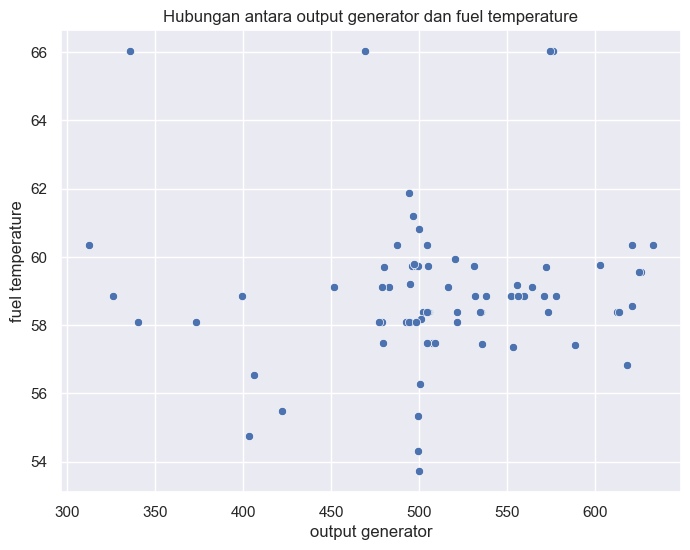

In [64]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['out_generator'], y=df['fuel_temp'])
plt.xlabel('output generator')
plt.ylabel('fuel temperature')
plt.title('Hubungan antara output generator dan fuel temperature')
plt.show()

In [65]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype=='O']
var_numerik = [var for var in df.columns if df[var].dtype!='O' and var!='unburn_carbon']

# Melihat variabel yang sudah dipisah
print(var_kategori)
print(var_numerik)

[]
['nilai_kalor', 'co', 'co2', 'out_generator', 'sfc', 'eco_gas_out_temp', 'pa_flow', 'o2', 'fuel_temp', 'sa_flow', 'carbon', 'hydrogen', 'nitrogen', 'sulfur', 'ash', 'total_moisture', 'oxygen']


In [66]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['unburn_carbon'], axis=1),
    df['unburn_carbon'],
    test_size = 0.2,
    random_state = 0)

# Melihat dimensi training set dan test set
print((X_train.shape), (X_test.shape))

(64, 17) (17, 17)


In [67]:
#mengecek target apakah sudah terpisah
y_train

74    1.2370
48    1.0650
6     0.3195
77    0.0510
10    0.2820
       ...  
85    0.1040
75    0.8390
72    0.5150
55    1.4900
51    0.1870
Name: unburn_carbon, Length: 64, dtype: float64

In [68]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

In [69]:
# Membuat pipeline dengan 3 model
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())  # Placeholder; model akan ditentukan dalam parameter grid
])

In [70]:
# Menyusun dictionary parameter
params = {
    'objective': 'regression',          # Menentukan jenis tugas: regresi
    'metric': 'l2',                     # Menggunakan L2 (MSE) untuk regresi
    'num_leaves': 31,                   # Jumlah maksimum daun dalam satu pohon
    'max_depth': -1,                    # Kedalaman maksimum pohon (nilai -1 berarti tidak ada batasan)
    'learning_rate': 0.05,              # Tingkat pembelajaran
    'n_estimators': 100,                # Jumlah estimators atau pohon yang dibangun
    'min_data_in_leaf': 20,             # Jumlah minimum data dalam daun pohon
    'feature_fraction': 0.9,            # Proporsi fitur yang digunakan untuk membangun setiap pohon
    'bagging_fraction': 0.8,            # Proporsi data yang digunakan untuk membangun pohon
    'bagging_freq': 5,                  # Frekuensi pengambilan sampel (untuk bagging)
    'lambda_l1': 0.1,                   # Regularisasi L1 (Lasso)
    'lambda_l2': 0.1,                   # Regularisasi L2 (Ridge)
    'min_child_weight': 1,              # Bobot minimum pada daun pohon
    'subsample': 0.8,                   # Fraksi sampel yang digunakan untuk membangun pohon
    'colsample_bytree': 0.8,            # Fraksi fitur yang digunakan untuk setiap pohon
    'scale_pos_weight': 1,              # Menyeimbangkan kelas (jika diperlukan)
    'verbosity': -1,                    # Tingkat verbosity
}

In [71]:
# Mendefinisikan parameter grid untuk pemilihan model
param_grid = {
    'model': [
        LinearRegression(),
        RandomForestRegressor(),
        LGBMRegressor(**params)
    ]
}

In [72]:
# Menggunakan GridSearchCV untuk memilih model terbaik
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Menampilkan struktur pipeline
grid_search.fit(X_train, y_train)  # Gantilah X dan y dengan data Anda
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['nilai_kalor', 'co', 'co2',
                                                   'out_generator', 'sfc',
                                                   'eco_gas_out_temp',
                                                   'pa_flow', 'o2', 'fuel_temp',
                                                   'sa_flow', 'carbon',
                                                   'hydrogen', 'nitrogen',
                                                   'sulfur', 'ash',
                                                   'total_moisture',
                                                   'ox...
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('model',
                 LGBMRegressor(bagging_fraction=0.8, bagging_freq=5,
                               colsample_bytree=0.8, feature_fraction=0.9,
                               lambda_l1=0.1, lambda_l2=0.1, learning_rate=0.05,
                               metric='l2', min_child_weight=1,
                               min_data_in_leaf=20, objective='regression',
                               scale_pos_weight=1, subsample=0.8,
                               verbosity=-1))])

In [73]:
# Mendapatkan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Melakukan prediksi dengan model terbaik
y_pred = best_model.predict(X_test)

# Menghitung MSE dan MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Best Model:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Best Model: {'model': LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, colsample_bytree=0.8,
              feature_fraction=0.9, lambda_l1=0.1, lambda_l2=0.1,
              learning_rate=0.05, metric='l2', min_child_weight=1,
              min_data_in_leaf=20, objective='regression', scale_pos_weight=1,
              subsample=0.8, verbosity=-1)}
Mean Squared Error (MSE): 0.15502336699474137
Mean Absolute Error (MAE): 0.2977887027373241


In [74]:
# Membuat DataFrame untuk menampilkan y_test dan y_pred
df_hasil = pd.DataFrame({
    'Actual': y_test,       # Nilai aktual dari y_test
    'Predicted': y_pred     # Nilai prediksi
})

# Menampilkan DataFrame hasil
print(df_hasil)

    Actual  Predicted
25  1.0550   0.447138
32  0.4900   0.447666
69  0.8390   0.549319
16  0.2720   0.336529
79  0.1445   0.349668
82  0.1010   0.615048
36  0.6540   0.558829
63  0.1420   0.606315
61  0.2620   0.213021
31  0.6420   0.422470
58  0.1240   0.472974
49  0.4390   0.544366
56  0.0820   0.423535
40  0.4195   0.579962
81  0.1010   0.399697
5   1.6795   0.581786
65  0.3460   0.504042


In [75]:
residual = y_test - y_pred

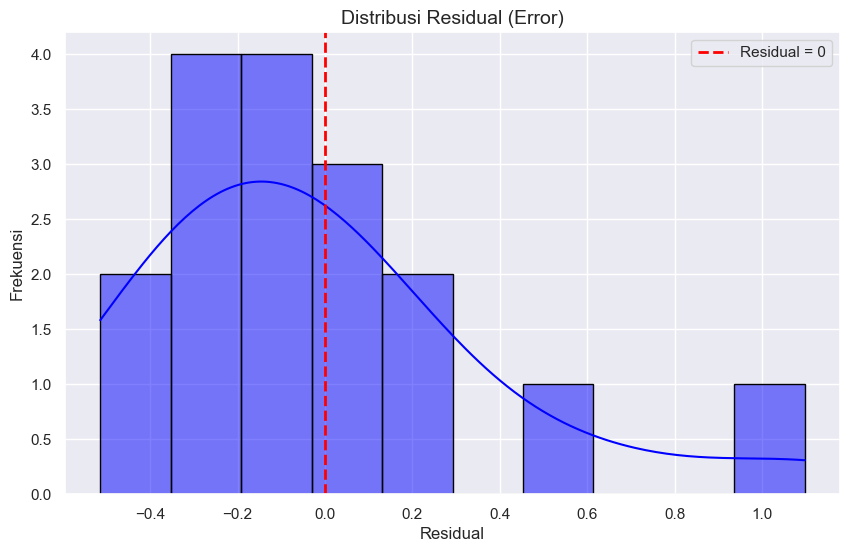

In [76]:
# Visualisasi distribusi residual
plt.figure(figsize=(10, 6))
sns.histplot(residual, kde=True, bins=10, color='blue', edgecolor='black')
plt.title('Distribusi Residual (Error)', fontsize=14)
plt.xlabel('Residual', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Residual = 0')  # Garis referensi nol
plt.legend()
plt.grid(True)
plt.show()

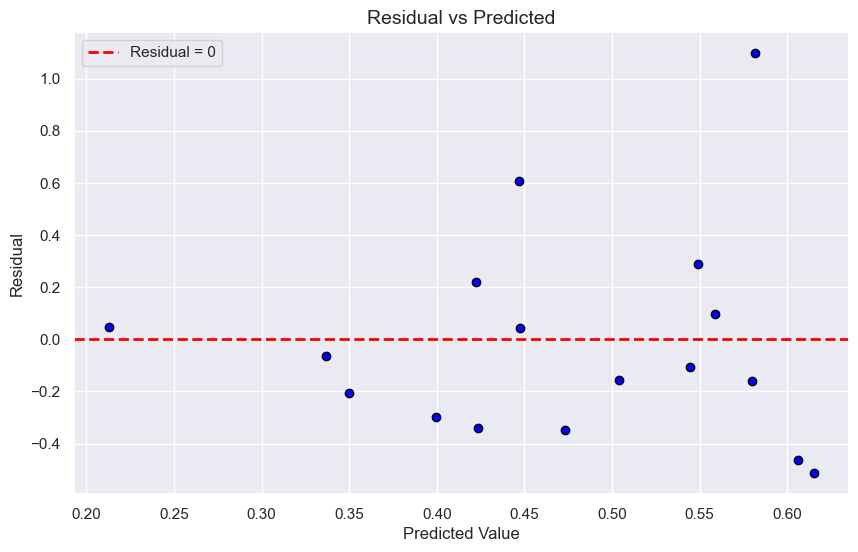

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residual, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Residual = 0')
plt.title('Residual vs Predicted', fontsize=14)
plt.xlabel('Predicted Value', fontsize=12)
plt.ylabel('Residual', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()